In [4]:
pip install leidenalg

  Using cached https://files.pythonhosted.org/packages/75/23/8170868d04b153b1b9ed1bb84348212bb4a08f31b292ef9d7f6ea648fd49/texttable-1.6.4-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip list

Package                            Version  
---------------------------------- ---------
alabaster                          0.7.12   
anaconda-client                    1.7.2    
anaconda-navigator                 1.9.12   
anaconda-project                   0.8.3    
asn1crypto                         1.0.1    
astroid                            2.3.1    
astropy                            3.2.1    
atomicwrites                       1.3.0    
attrs                              19.2.0   
Babel                              2.7.0    
backcall                           0.1.0    
backports.functools-lru-cache      1.5      
backports.os                       0.1.1    
backports.shutil-get-terminal-size 1.0.0    
backports.tempfile                 1.0      
backports.weakref                  1.0.post1
beautifulsoup4                     4.8.0    
bitarray                           1.0.1    
bkcharts                           0.2      
bleach                             3.1.0    
bokeh     

In [1]:
pip install python-louvain

  Created wheel for python-louvain: filename=python_louvain-0.16-cp37-none-any.whl size=9401 sha256=84d600264846ff873965eb39a2f3a7b477767e7475df301b775b86d366e40acc
  Stored in directory: C:\Users\HP\AppData\Local\pip\Cache\wheels\73\68\16\01a6fa0a2f8a718cda81c3b8108d5afbc9feb1030d053e5532
Successfully built python-louvain
Note: you may need to restart the kernel to use updated packages.


In [6]:
import leidenalg 
import igraph as ig
import community

In [7]:
graph = { 
   "a" : ["b","c"],
   "b" : ["a", "d"],
   "c" : ["a", "d"],
   "d" : ["e"],
   "e" : ["d","f"],
    "f": ["e","j"],
    "j" : ["f"]
}

In [8]:
a=[[i] for i in list(graph.keys())]

In [9]:
a

[['a'], ['b'], ['c'], ['d'], ['e'], ['f'], ['j']]

In [10]:
# задать грав как словарь -- вершины-ключи, значения - список вершин с которым соединен ключ
#функция выдает множество вершин графа 
# нужна чтобы представить каждую вершину, как сообщество
def singletonPartitin(G):
    v = [[i] for i in list(G.keys())]
    return v

In [11]:
# edges 
def findedges(G):
    edgename = []
    for vrtx in G:
        for nxtvrtx in G[vrtx]:
            if {nxtvrtx, vrtx} not in edgename:
                edgename.append({vrtx, nxtvrtx})
    return edgename

In [12]:
findedges(graph)

[{'a', 'b'},
 {'a', 'c'},
 {'b', 'd'},
 {'c', 'd'},
 {'d', 'e'},
 {'e', 'f'},
 {'f', 'j'}]

In [13]:
part = { 
   "C1" : {"a" : ["b","c"],   "c" : ["a"], "b" : ["a"] },
   "C2" : {"d" : ["e"], "e" : ["d"]},
    "C3": {"j": ["f"], "f": ["j"]}
}

In [124]:
[part.setdefault(i)for i in list(part.keys())]

[{'a': ['b', 'c'], 'c': ['a'], 'b': ['a']},
 {'d': ['e'], 'e': ['d']},
 {'j': ['f'], 'f': ['j']}]

In [101]:
l=[]
for el in findedges(graph):
    if el not in a:
        l.append(el)

In [102]:
l

[{'b', 'd'}, {'c', 'd'}, {'e', 'f'}, {'f', 'j'}]

In [125]:
listk = [[i,j] for i in list(part.keys()) for j in list(part.keys()) if i<j ]

In [126]:
listk

[['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']]

In [127]:
a = findedges(part.setdefault(listk[0][0]))
a.extend(findedges(part.setdefault(listk[0][1])))

In [128]:
a

[{'a', 'b'}, {'a', 'c'}, {'d', 'e'}]

In [129]:
ver = list(part.setdefault(listk[0][0]).keys())
ver.extend(list(part.setdefault(listk[0][1]).keys()))
ver

['a', 'c', 'b', 'd', 'e']

In [130]:
newv = []
gr = {}
for k in ver:
    for el in graph.get(k):
        if el in ver:
            newv.append(el)
    gr.update([(k,newv)])
    newv = []

In [131]:
gr

{'a': ['b', 'c'], 'c': ['a', 'd'], 'b': ['a', 'd'], 'd': ['e'], 'e': ['d']}

In [132]:
ed = findedges(gr)

In [133]:
ed

[{'a', 'b'}, {'a', 'c'}, {'c', 'd'}, {'b', 'd'}, {'d', 'e'}]

In [134]:
[el for el in ed if el not in a]

[{'c', 'd'}, {'b', 'd'}]

In [106]:
listk[0]

[1, 2]

In [135]:
{listk[0][0]+listk[0][1]:[el for el in ed if el not in a]}

{'C1C2': [{'c', 'd'}, {'b', 'd'}]}

In [137]:
ll={}
a=[]
for el in listk:
    a = findedges(part.setdefault(el[0]))
    a.extend(findedges(part.setdefault(el[1])))
    ll.update([(el[0]+el[1], a)])
    a= []

In [138]:
ll

{'C1C2': [{'a', 'b'}, {'a', 'c'}, {'d', 'e'}],
 'C1C3': [{'a', 'b'}, {'a', 'c'}, {'f', 'j'}],
 'C2C3': [{'d', 'e'}, {'f', 'j'}]}

In [283]:
newv = []
l=[]
gr = {}
ll1={}
ll2={}
d={}
for el in listk:
    ver = list(part.setdefault(el[0]).keys())
    ver.extend(list(part.setdefault(el[1]).keys()))
    a = findedges(part.setdefault(el[0]))
    a.extend(findedges(part.setdefault(el[1])))
    for k in ver:
        for i in graph.get(k):
            if i in ver:
                newv.append(i)
        gr.update([(k,newv)])
        ed = findedges(gr)
        newv = []
        red = [e for e in ed if e not in a]
    ll1.update([(el[0]+el[1],red)])
    if red !=[]:
        if el[0] not in d.keys():
            d.update([(el[0],None)])
        if d[el[0]] == None:
            d.update([(el[0],[el[1]])])
        if d[el[0]] != None and el[1]not in  d[el[0]]:
            d[el[0]].append(el[1])
        
        if el[1] not in d.keys():
            d.update([(el[1],None)])
        if d[el[1]] == None:
            d.update([(el[1],[el[0]])])
        if d[el[1]] != None and el[1]not in  d[el[0]]:
            d[el[1]].append(el[0])
        
            
    keys = []
    w =[]
    ver= []
    a=[]
    gr={}
    ed = []
    
ll1

{'C1C2': [{'c', 'd'}, {'b', 'd'}], 'C1C3': [], 'C2C3': [{'e', 'f'}]}

In [284]:
d

{'C1': ['C2'], 'C2': ['C1', 'C3'], 'C3': ['C2']}

In [214]:
listk

[['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']]

In [182]:
kk = {'C1':['C2'], 'C2':['C1','C3'],'C3':['C2'] }

In [290]:
"""создает агрегированный гаф
    каждое сообщество в разбиении становится узлом, множество ребер - ребра соединяющие вершины двух разбиений
    
    разбиение это множество сообществ, сообщество - множество узлов, объединение сообществ = множеству узлов
    
    ребра - многрагранники, ребра соединяют сообщества,т.е. соединяют каждую вершину из одного сообщества с вершиной из другого
         ребра, образованные такими вершинами - ребра исходного графа 
         
     вершины агрегированного графа будут также графами, представим их словарями 
         ребра соединяют графы, каждое ребро состоит из ребер исходного графа """ 
#агрегирует граф, выдает [{AG_edge: G_edges}, AG_grap] 
def AggregateGraph(G,P):
    
    vert =list(P.keys())
    
    #all possible pairs of communities
    listpairs = [[i,j] for i in vert for j in vert if i<j ]
    
    #edges of part G, containing two communities - dict{pair: edges}
    d_part_G={}
    part_gr = {}
    new_ver = []
    arr_gr = {}
    for el in listpairs:
        #all verticies in pair of 2 communities
        eme = list(P.setdefault(el[0]).keys())
        eme.extend(list(P.setdefault(el[1]).keys()))
        #all edges in pair of 2 communities
        emv = findedges(P.setdefault(el[0]))
        emv.extend(findedges(P.setdefault(el[1])))
        for k in eme:
            for i in G.get(k):
                if i in eme:
                    new_ver.append(i)
            #part of G? cintaining 2 communities
            part_gr.update([(k,new_ver)])
            #edgies in part G
            new_ed =findedges(part_gr)
            #edges between 2 communities
            right_ed = [e for e in new_ed if e not in emv]
            new_ver = []
        #dict -- {pair: edges}
        d_part_G.update([(el[0]+el[1],right_ed)])
        if right_ed !=[]:
            if el[0] not in arr_gr.keys():
                arr_gr.update([(el[0],None)])
            if arr_gr[el[0]] == None:
                arr_gr.update([(el[0],[el[1]])])
            if arr_gr[el[0]] != None and el[1] not in arr_gr[el[0]] :
                arr_gr[el[0]].append(el[1])

            if el[1] not in arr_gr.keys():
                arr_gr.update([(el[1],None)])
            if arr_gr[el[1]] == None:
                arr_gr.update([(el[1],[el[0]])])
            if arr_gr[el[1]] != None and el[0] not in arr_gr[el[1]]:
                arr_gr[el[1]].append(el[0])
        eme= []
        emv = []
        part_gr={}
        new_ed=[]

    return [d_part_G,arr_gr]

In [291]:
AggregateGraph(graph,part)

[{'C1C2': [{'c', 'd'}, {'b', 'd'}], 'C1C3': [], 'C2C3': [{'e', 'f'}]},
 {'C1': ['C2'], 'C2': ['C1', 'C3'], 'C3': ['C2']}]

In [ ]:
"""сообщества могут быть разделены на подмножжества S
 
 S состоит из графиов, поэтому ее размерность сумма размерностей графа, т.е. сумма вершин графиов

 расстояние между вершиной v и S-v = E(v,S-v) >= g |v|(|S-v|), будем рассматривать только такие вершины
 проходимся по каждой вершине из выбранных, если она одиночное сообщество
 создаем множество сообществ, подходящих оценке
 выбираем рандомное сообществот и проверяем
 """
def MergeNodesSubset(G,P,S):
    pass

In [293]:
"""
из всех вершин, являющихся сообшествами, выбираем вершину и  определяем подходящее сообщество с помощью функии оптимальности
определяем окружение вершины, т.е. все вершины связанные с выбранной ребрами
добавляем соседнии вершины в список для посещения

"""
def MoveNodesFast(G,P):
    pass

In [ ]:
def modularity()

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.complete_graph(100)

C:\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


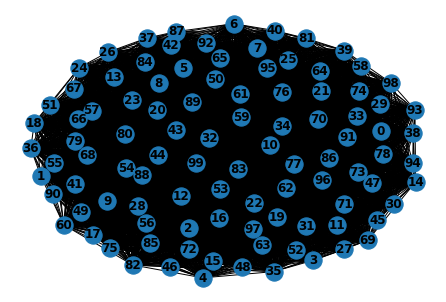

In [3]:
nx.draw(G, with_labels=True, font_weight='bold')

In [4]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99))

In [2]:
G = nx.karate_club_graph ()

C:\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


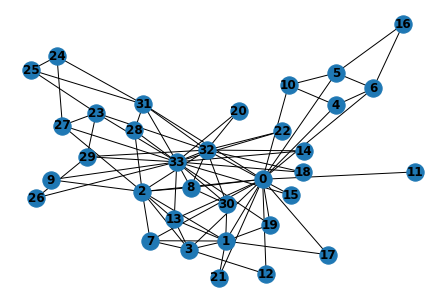

In [4]:
nx.draw(G, with_labels=True, font_weight='bold')

1) сделать начальное разбиение. Выбираем вершину и добавляем в сообщество, затем определяем остальные вершины с которыми она связана и добавляем в тоже сообщество или создаем новое. 
2) задаем граф с помощью матрицы смежности

In [12]:
import numpy as np